# the data using tf.data 

### wayyyyy tough to follow and understand

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE
# for newer versions use above
# AUTOTUNE = tf.contrib.data.AUTOTUNE

In [4]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
import glob

In [6]:
import pathlib

# defining paths and var


In [7]:
data_dir = pathlib.Path('/Users/j/.keras/datasets/flower_photos')

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips'],
      dtype='<U10')

# Load using tf.data

In [10]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

# testing out some files

In [11]:
glob.glob(str(data_dir/'*/*'))[0:2]

['/Users/j/.keras/datasets/flower_photos/roses/16209331331_343c899d38.jpg',
 '/Users/j/.keras/datasets/flower_photos/roses/5777669976_a205f61e5b.jpg']

In [12]:
for file in list_ds.take(5):
    print(file.numpy())

b'/Users/j/.keras/datasets/flower_photos/tulips/7481217920_6f65766a1c_n.jpg'
b'/Users/j/.keras/datasets/flower_photos/tulips/303858799_942b9c09e7_m.jpg'
b'/Users/j/.keras/datasets/flower_photos/daisy/2838487505_6c3b48efa5_m.jpg'
b'/Users/j/.keras/datasets/flower_photos/roses/6867597533_d65d1c39fb_n.jpg'
b'/Users/j/.keras/datasets/flower_photos/daisy/1441939151_b271408c8d_n.jpg'


In [13]:
BATCH_SIZE = 32
#  Batch Sixe is how many images are we feeding in on one batch. It can be set to none. It is important to set it
# to optimise computing power
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

# converting a file paths to an (image_data, label) pair 

In [14]:
os.path.sep

'/'

In [52]:
print(list_ds,"\n\n",CLASS_NAMES)

<DatasetV1Adapter shapes: (), types: tf.string> 

 ['roses' 'sunflowers' 'daisy' 'dandelion' 'tulips']


In [53]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split([file_path], os.path.sep)
    # The second to last is the class-directory
    return tf.equal(parts.values[-2], CLASS_NAMES)

In [54]:
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [55]:
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [56]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [57]:
for image, label in labeled_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [False False False False  True]


# more preprocessing 

To train a model with this dataset you will want the data:

To be well shuffled.

To be batched.

Batches to be available as soon as possible.

In [63]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
      # This is a small dataset, only load it once, and keep it in memory.
      # use `.cache(filename)` to cache preprocessing work for datasets that don't
      # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

      # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

      # `prefetch` lets the dataset fetch batches in the background while the model
      # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [64]:
train_ds = prepare_for_training(labeled_ds)

image_batch, label_batch = next(iter(train_ds))

In [68]:
def show_batch(image_batch, label_batch):
      plt.figure(figsize=(10,10))
      for n in range(25):
          ax = plt.subplot(5,5,n+1)
          plt.imshow(image_batch[n])
          plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
          plt.axis('off')

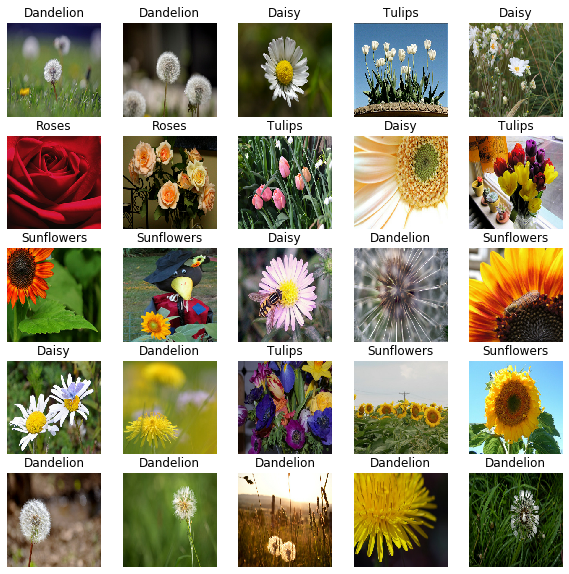

In [69]:
show_batch(image_batch.numpy(), label_batch.numpy())

this method is better than tf.keras.preprocessing but it is really hard to follow along